In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [56]:
rng = np.random.default_rng(42)
M = 100
N = 30

# X = np.ones((M, 1))
# y = np.zeros((N, ))

keras.backend.clear_session()

v = tf.Variable(
    initial_value=2*rng.random((M, N))-1,
    trainable=True,
    dtype=tf.float32
)
lr = 3e-1
for epoch in range(300):
    if (epoch + 1) % 50 == 0:
        lr *= 0.5
    with tf.GradientTape() as g:
        s = tf.linalg.svd(v, compute_uv=False)
        loss = tf.linalg.norm(s - 1)
        v.assign_sub(lr * g.gradient(loss, v))

In [57]:
tf.linalg.svd(v, compute_uv=False)

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([0.99983984, 0.99979085, 0.9997668 , 0.99975693, 0.99973416,
       0.99973416, 0.9997132 , 0.9996984 , 0.9996584 , 0.9996399 ,
       0.9996351 , 0.99961644, 0.99960136, 0.99959266, 0.99958766,
       0.9995782 , 0.99955744, 0.9995368 , 0.9995119 , 0.9994962 ,
       0.99947476, 0.99946207, 0.9994523 , 0.99942887, 0.99942255,
       0.99940103, 0.99936837, 0.9993468 , 0.99930155, 0.99926955],
      dtype=float32)>

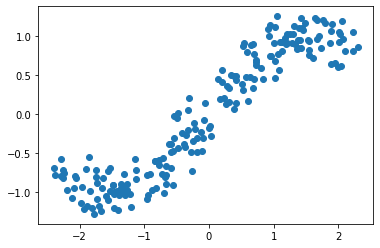

In [99]:
rng = np.random.default_rng(42)

N = 200
t = (2*rng.random((N, ))-1)*2.3
X = np.stack([t, np.sin(t)], axis=1) + 0.3*(2*rng.random((N, 2))-1)
y = np.zeros((2, ))
plt.scatter(*X.T)
plt.show(); plt.close();

In [174]:
keras.backend.clear_session()
rng = np.random.default_rng(42)
ws = [
    tf.Variable(
        initial_value=2*rng.random((2, 32))-1,
        trainable=True,
        dtype=tf.float32
    ),
    tf.Variable(
        initial_value=2*rng.random((32, 32))-1,
        trainable=True,
        dtype=tf.float32
    ),
    tf.Variable(
        initial_value=2*rng.random((32, 2))-1,
        trainable=True,
        dtype=tf.float32
    )
]
lr = 3e-2
for epoch in range(500):
    with tf.GradientTape() as g:
        X_sub = rng.choice(X, rng.integers(N//2, 3*N//4))
        outputs = tf.nn.elu(tf.nn.elu(X_sub @ ws[0]) @ ws[1]) @ ws[2]
        outputs = tf.linalg.svd(outputs, compute_uv=False)
        outputs = tf.linalg.norm(outputs - 1)
        dws = g.gradient(outputs, ws)
    for w, dw in zip(ws, dws):
        w.assign_sub( lr * dw)

[1.2907832 0.3639773]


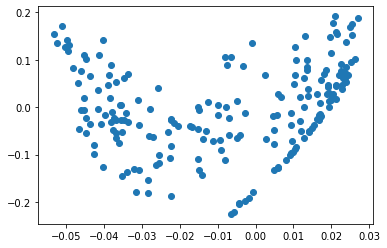

In [175]:
fs = (tf.nn.elu(tf.nn.elu(X @ ws[0]) @ ws[1]) @ ws[2]).numpy()
print(np.linalg.svd(fs)[1])
plt.scatter(*fs.T)
plt.show(); plt.close();